In [1]:
import tensorflow as tf
from keras import models,layers
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback
import numpy as np
from keras.preprocessing import image
import datetime


2025-04-07 19:51:26.935373: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 19:51:26.935960: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 19:51:26.939829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 19:51:26.950513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744035686.969026   43389 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744035686.97

In [2]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
     "potato_data",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 2152 files belonging to 3 classes.


E0000 00:00:1744035689.244093   43389 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744035689.244769   43389 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
class_name=ds.class_names
batch_size=32


In [4]:
for image_batch,label_batch in ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 2 2 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 2 1 0 0]


2025-04-07 19:51:29.406223: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


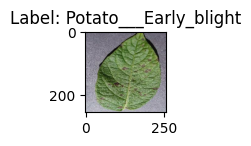

(256, 256, 3)


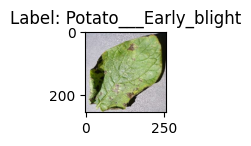

(256, 256, 3)


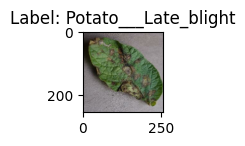

(256, 256, 3)


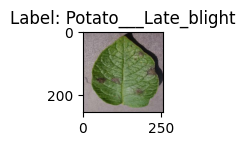

(256, 256, 3)


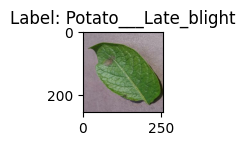

(256, 256, 3)


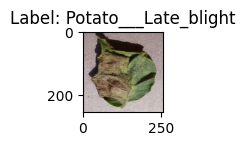

(256, 256, 3)


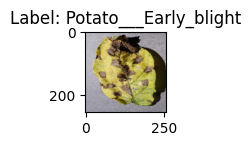

(256, 256, 3)


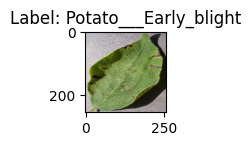

(256, 256, 3)


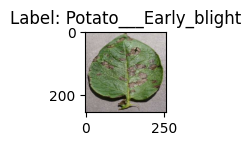

(256, 256, 3)


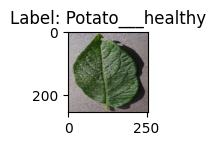

(256, 256, 3)


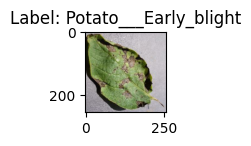

(256, 256, 3)


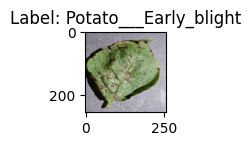

(256, 256, 3)


2025-04-07 19:51:30.224708: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
for image_batch,label_batch in ds.take(1):
    for i in range(12):
         ax=plt.subplot(4,3,i+1)
         plt.imshow(image_batch[i].numpy().astype("uint8"))
         plt.title(f"Label: {class_name[label_batch[i].numpy()]}")
         plt.show()
         print(image_batch[0].shape)

In [6]:
def get_dataset(ds,train_split=0.8,test_split=0.1,val_spilt=0.1,shuffle=True,shuffle_size=100000):
    if(shuffle):
        ds=ds.shuffle(shuffle_size,seed=12)
    
    total=len(ds)
    
    train_size=int(total*train_split)
    test_size=int(total*test_split)

    train_data=ds.take(train_size)
    test_data=ds.skip(train_size).take(test_size)
    val_data=ds.skip(train_size).skip(test_size)

    return train_data,test_data,val_data
    

In [7]:
train_data,test_data,val_data=get_dataset(ds)

In [8]:
len(train_data)

54

In [9]:
len(test_data)

6

In [10]:
len(val_data)

8

In [11]:
train_ds = train_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)


In [12]:
model_datapre = tf.keras.Sequential([
    layers.Resizing(256, 256), 
    layers.Rescaling(1./255),
    
    layers.RandomFlip('horizontal'), 
    layers.RandomRotation(0.2),      
    layers.RandomZoom(0.2),     
])


In [13]:
image_shape=(32,256,256,3)
model=tf.keras.Sequential([
    model_datapre,

    layers.Conv2D(32,(3,3),activation='relu',input_shape=image_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])
model.build(input_shape=image_shape)

/media/parth/STUDY/potato_project/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [16]:
debug_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: loss={logs['loss']}, accuracy={logs.get('accuracy')}")
)

model.fit(
    train_ds,
    epochs=50,  
    batch_size=batch_size,
    validation_data=val_data,
    callbacks=[debug_callback],
    verbose=1
)


Epoch 1/50


/media/parth/STUDY/potato_project/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.4799 - loss: 0.9682Epoch 1: loss=0.9225000739097595, accuracy=0.48726850748062134
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 643ms/step - accuracy: 0.4800 - loss: 0.9674 - val_accuracy: 0.4883 - val_loss: 0.8867
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.5403 - loss: 0.8452Epoch 2: loss=0.779237687587738, accuracy=0.5995370149612427
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 632ms/step - accuracy: 0.5414 - loss: 0.8440 - val_accuracy: 0.7305 - val_loss: 0.5849
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.7421 - loss: 0.5926Epoch 3: loss=0.5875376462936401, accuracy=0.7488425970077515
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 616ms/step - accuracy: 0.7422 - loss: 0.5925 - val_accuracy: 0.7198 - val_loss: 0.6577
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.7998 - loss: 0.4765Epoch 4: loss=0.529037594795227, accuracy=0.7818287014961243
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.7995 - loss: 0

In [17]:
model.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9315 - loss: 0.3099


[0.2501443028450012, 0.9375]

In [18]:
val_accuracy = model.history.params
print(val_accuracy)

{'verbose': 1, 'epochs': 50, 'steps': 54}


Random Image


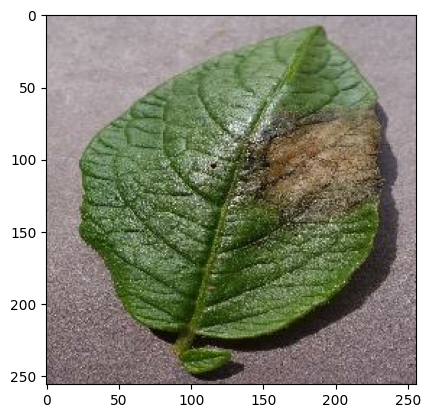

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual disease: Potato___Late_blight
Predicted disease: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual disease: Potato___Late_blight
Predicted disease: Potato___Late_blight


2025-04-07 21:40:42.369590: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
import random

for batch, label in test_data.take(1):
    random_index = random.randint(0, batch_size - 1)  
    random_image = batch[random_index]
    random_label = label[random_index]

    print("Random Image")
    plt.imshow(random_image.numpy().astype('uint8'))
    plt.show()

    prediction = model.predict(tf.expand_dims(random_image, axis=0))
    predicted_class = np.argmax(prediction[0])

    print("Actual disease:", class_name[random_label.numpy()])
    print("Predicted disease:", class_name[predicted_class])

In [39]:
def function(img):
    img_array = img.numpy()
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


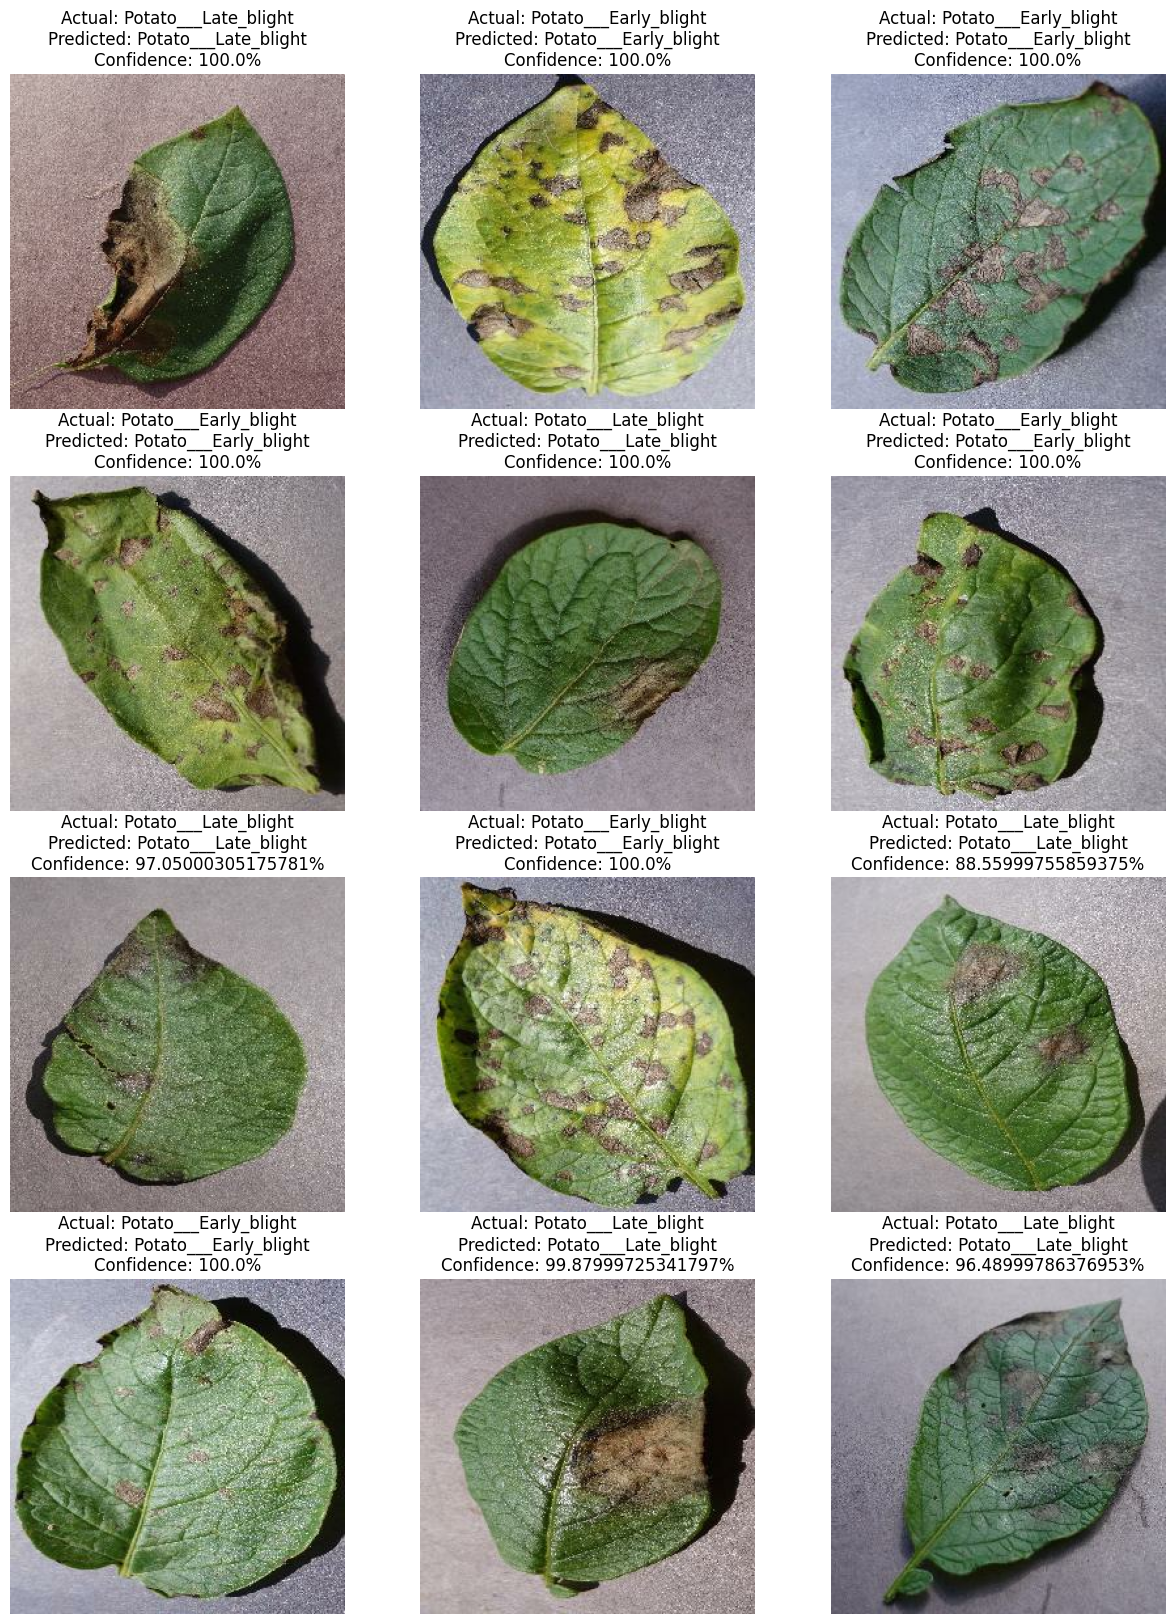

In [45]:
plt.figure(figsize=(15,20))
for batch,label in test_data.take(1):
    for i in range(12):
        pred,con=function(batch[i])
        random_label = label[i]
        actual_class = class_name[random_label.numpy()]
        plt.subplot(4, 3, i + 1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.axis("off")

        
        plt.title(f"Actual: {actual_class}\nPredicted: {pred}\nConfidence: {con}%")
        
        

In [ ]:


model_num=datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

model.save(f"./models/model_{model_num}.h5")